In [1]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
import pandas as pd
import sys

'''
src_path = sys.path[0].replace("figures\visualization\script", "src")
#replace notebook as scripts
data_path = sys.path[0].replace("figures\visualization\script", "data")
if src_path not in sys.path:
    sys.path.append(src_path)

out_path = sys.path[0].replace("figures\visualization\script", "output")
'''

# set default params of plot
rc_={
    "figure.dpi":300,
    "font.size":10,
    "axes.facecolor":"white",
    "savefig.facecolor":"white",
    "text.usetex":True,
    "legend.frameon":False
}
mpl.rcParams.update(rc_)

from plot_helper import *

path_prefix=r'D:\Codes\Energy_grid_new'

# plot for thesis topic 1

to testify the MPC performance with and without dc in a wider test scope

In [2]:
# include following param settings
# MPC-GT
# MPC-Prediction
# MPC-Disturbance-normal-0.03
# MPC-Heuristic
# MPC-Naive
# RBC-MSC

A. 12months dc=0.6&dc=0

In [3]:
# load data

path=path_prefix+r"\output\experiments\thesis_topic1\6h-bat-12months-0.6dc.xlsx"
df_6dc=pd.read_excel(path)
df_opex_6dc=pre_process(df_6dc,'OPEX','month_of_year')
df_tou_6dc=pre_process(df_6dc,"tou_cost",'month_of_year')

path=path_prefix+r"\output\experiments\thesis_topic1\6h-bat-12months-0dc.xlsx"
df_0dc=pd.read_excel(path)
df_opex_0dc=pre_process(df_0dc,'OPEX','month_of_year')
df_tou_0dc=pre_process(df_0dc,"tou_cost",'month_of_year')

   strategy   pred_model  month_of_year        OPEX            label   
0       MPC           GT              1  351.747123           MPC-GT  \
1       MPC   Prediction              1  364.843711   MPC-Prediction   
2       MPC  Disturbance              1  357.335552  MPC-Disturbance   
3       MPC    Heuristic              1  360.866129    MPC-Heuristic   
4       MPC        Naive              1  360.946711        MPC-Naive   
..      ...          ...            ...         ...              ...   
67      MPC   Prediction             12  335.081370   MPC-Prediction   
68      MPC  Disturbance             12  326.453428  MPC-Disturbance   
69      MPC    Heuristic             12  326.782327    MPC-Heuristic   
70      MPC        Naive             12  329.790152        MPC-Naive   
71      MSC           GT             12  400.684694           MSC-GT   

    relative_OPEX  
0        0.000000  
1       14.998987  
2        6.400200  
3       10.443625  
4       10.535912  
..            .

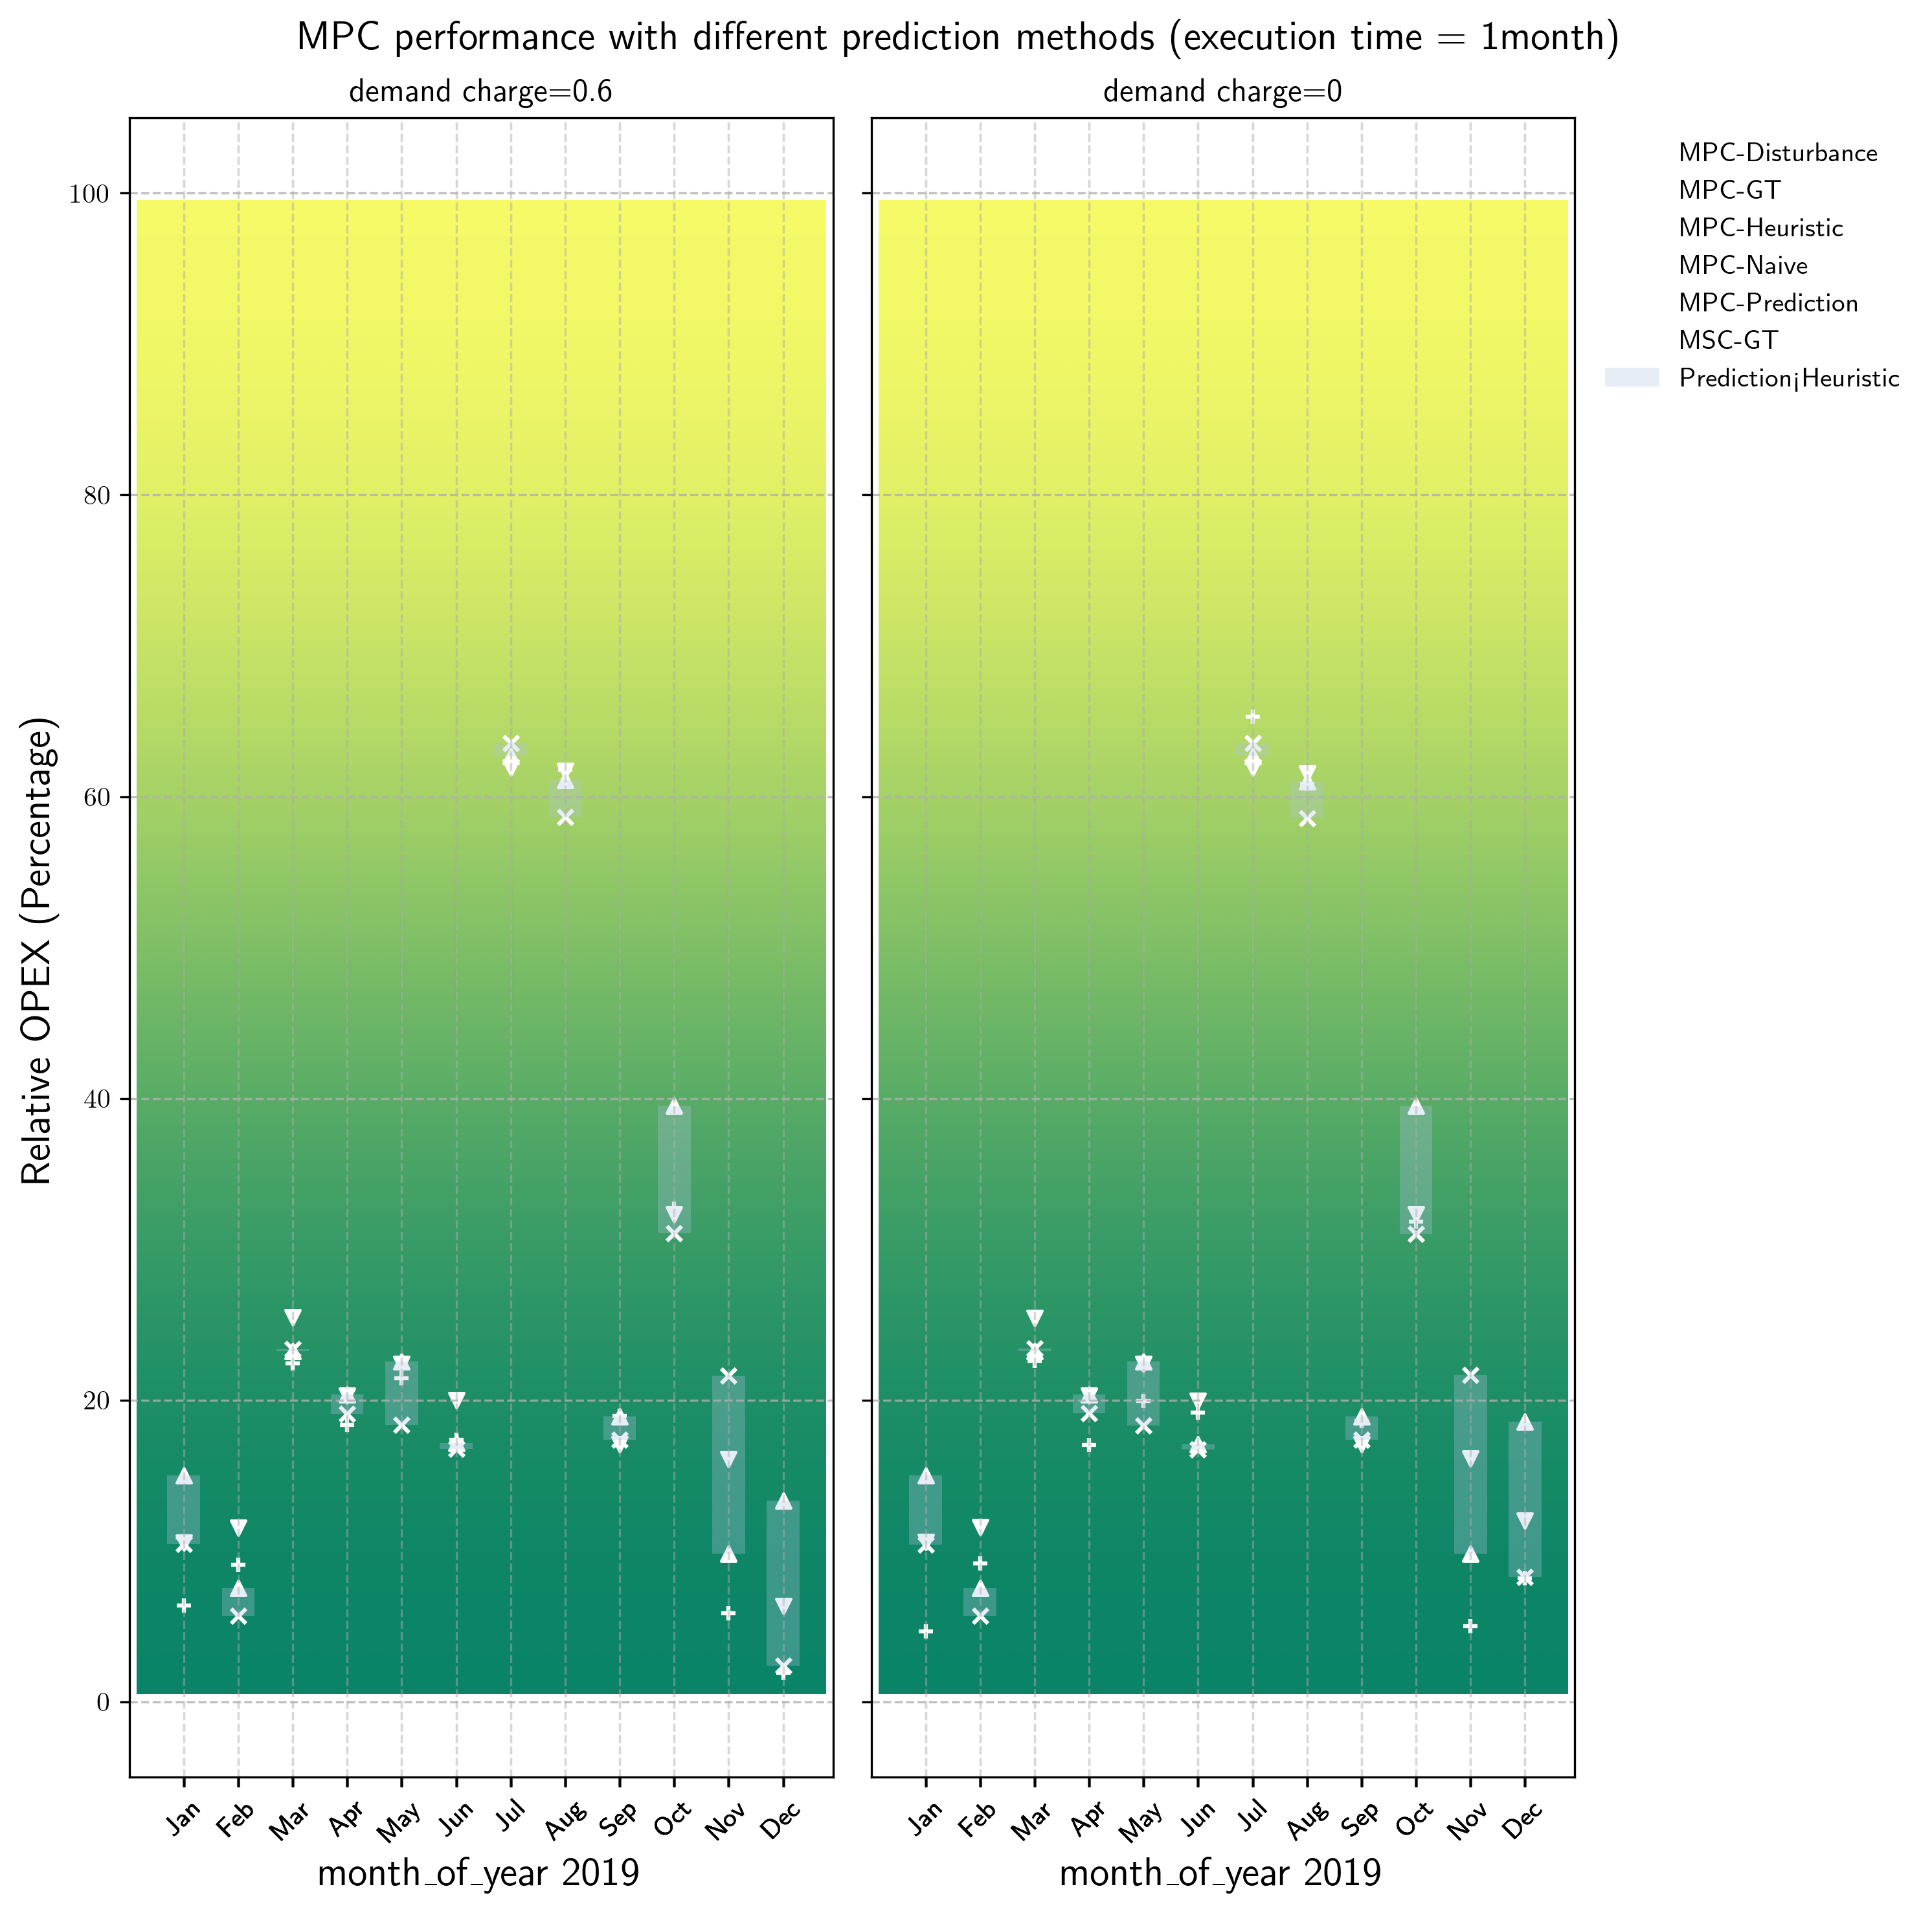

In [6]:

plot_params={
    "subplots":{
        "0":{
            "df":df_opex_6dc,           
            "key":"OPEX",
            "duration_key":"month_of_year",
            "subtitle":"demand charge=0.6",
            "show_shadow":False,
            "gradient":True,
            "gradient_params":{
                "extend":(0.01,0.99,0.05,0.95),
                "cmap_name":"summer",
                "cmap_range":(0,1),
                "alpha":1
                }
            },
        "1":{
            "df":df_opex_0dc,
            "key":"OPEX",
            "duration_key":"month_of_year",
            "subtitle":"demand charge=0",
            "show_shadow":False,
            "gradient":True,
            "gradient_params":{
                "extend":(0.01,0.99,0.05,0.95),
                "cmap_name":"summer",
                "cmap_range":(0,1),
                "alpha":1
                }
            },
    },
    "relative":True,
    "limit":[-5,105],
    "fontsize":10,
    "n_subplots":2,
    "figsize":(10,10),
    "show_notes":False,
    "marker_s":250,
    "save_fn":'multi-thesis-topic1-6h-bat-12months-0.6&0dc-relative-opex.png',
    "suptitle":"MPC performance with different prediction methods (execution time = 1month)"
}

r_opex_month_6dc=mplot_origin_valid_bar(plot_params)


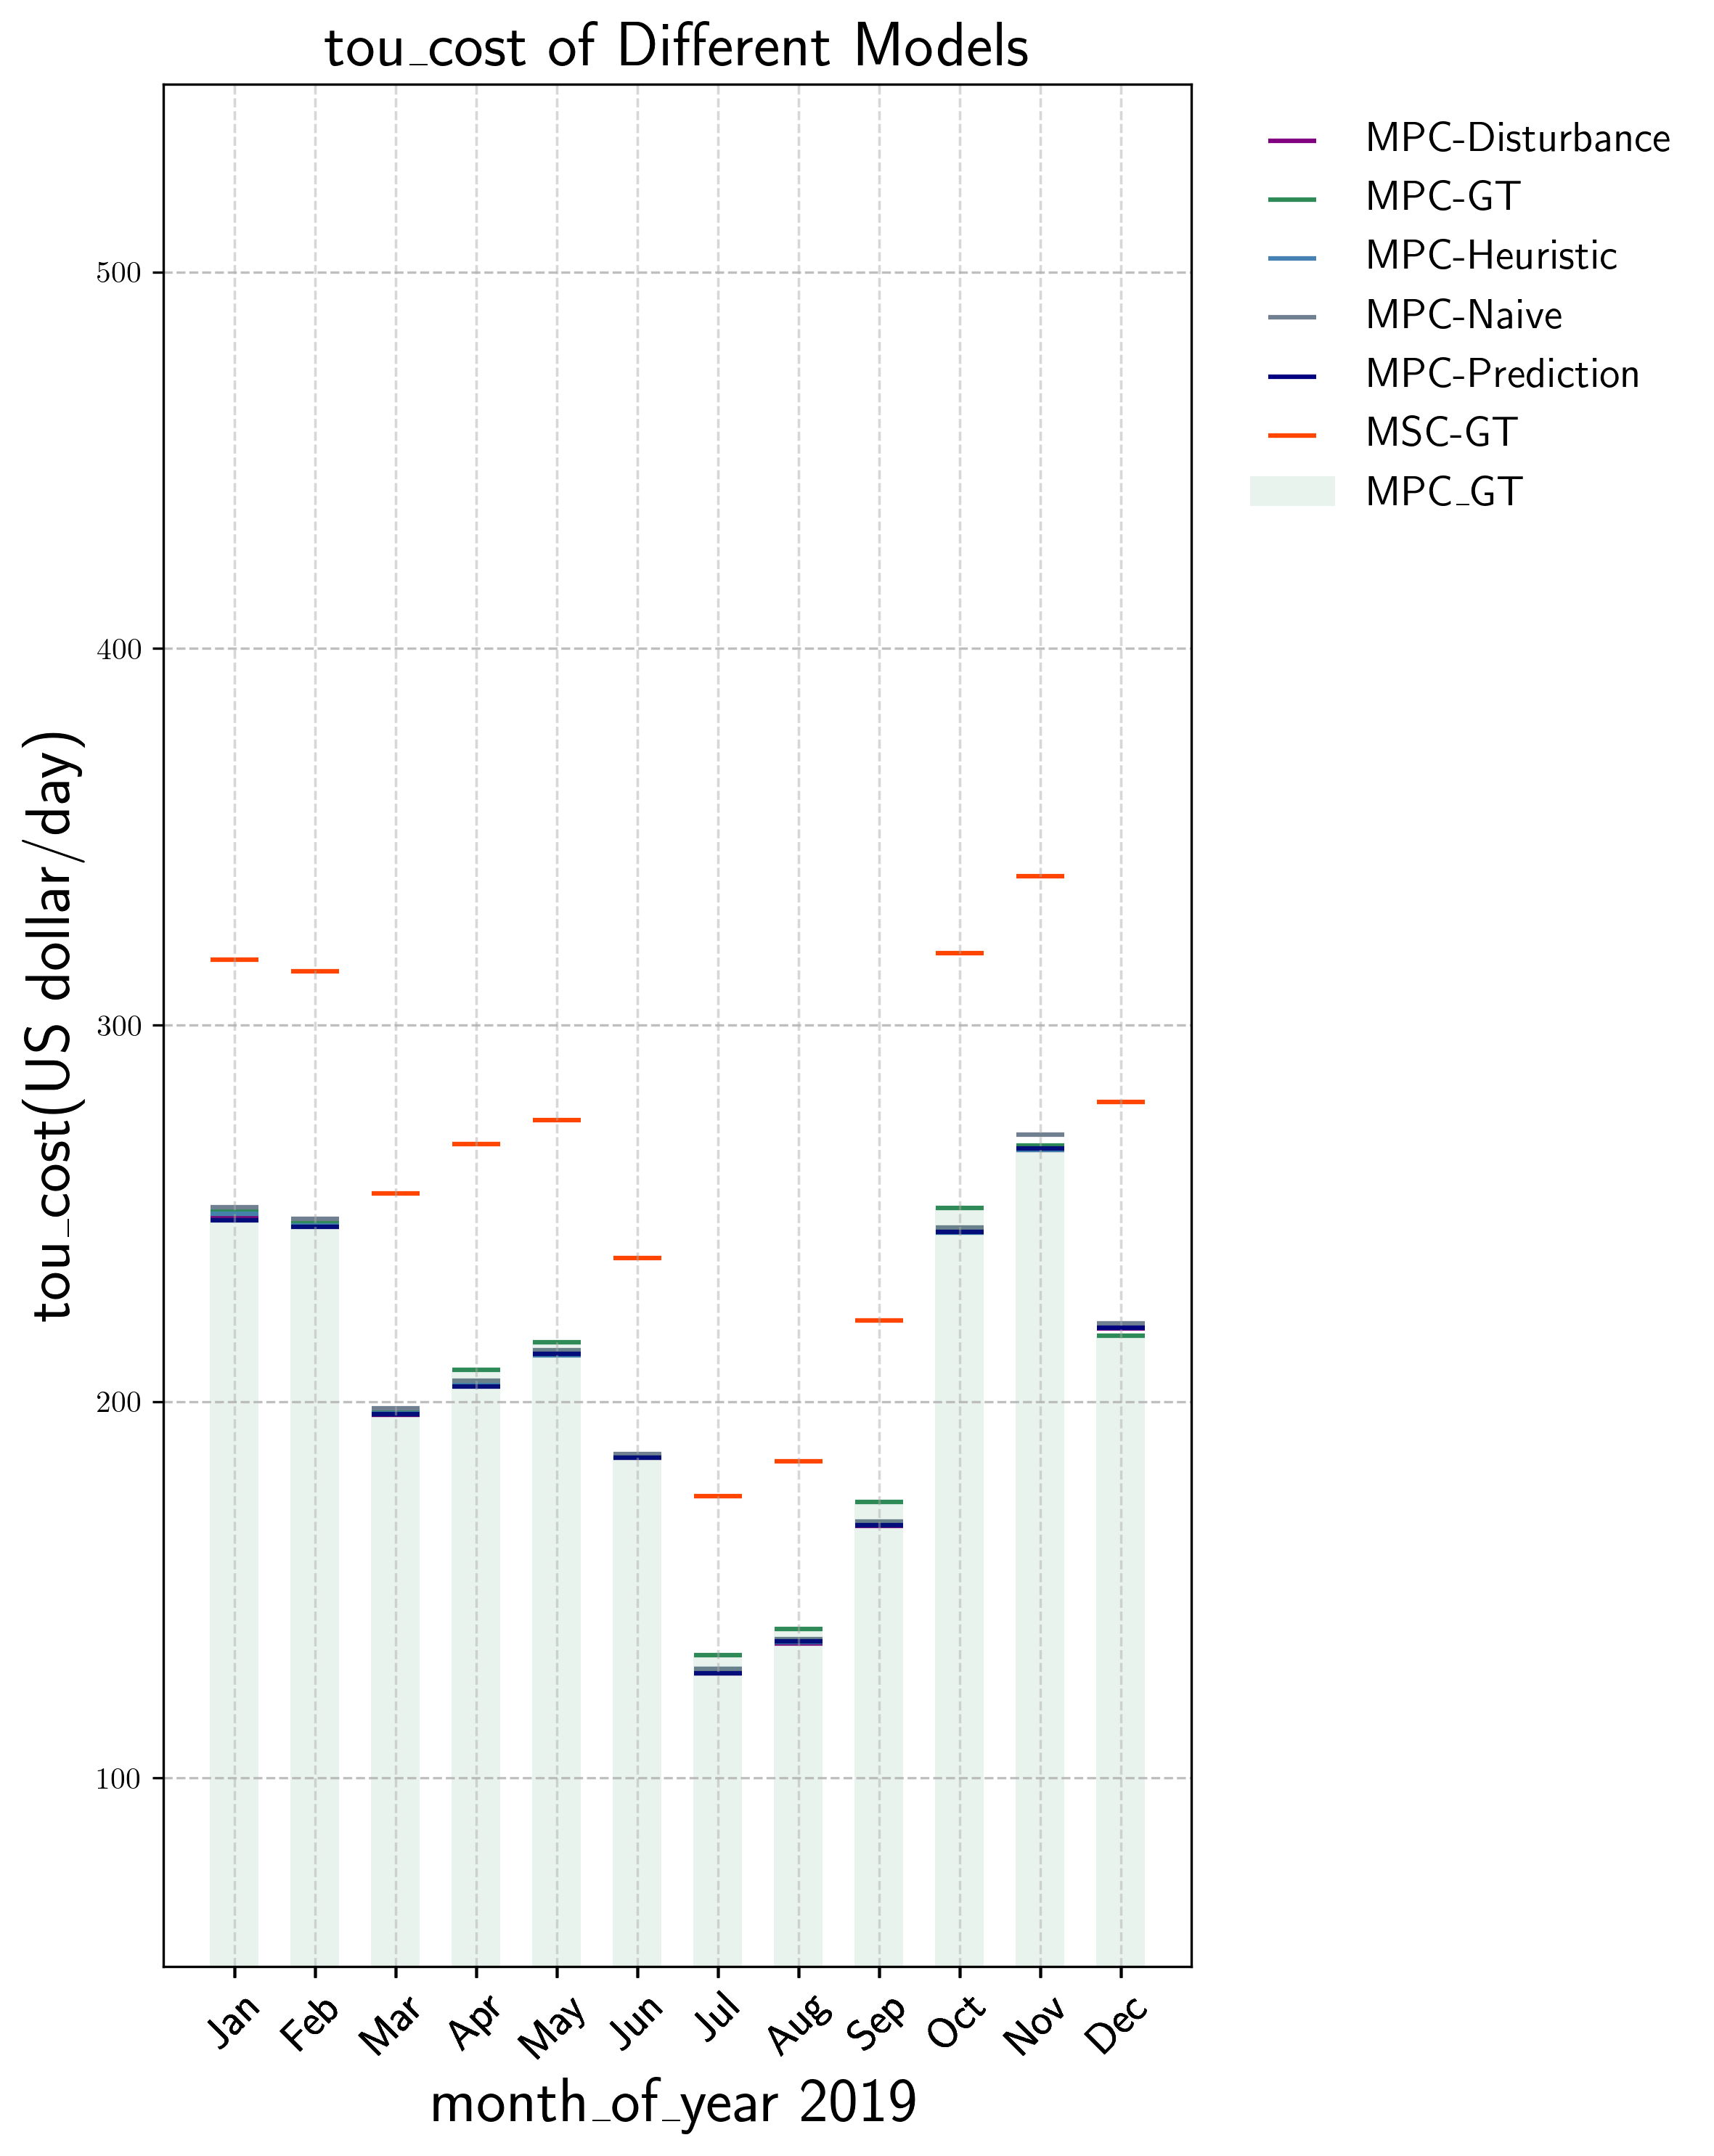

In [10]:
limit=[50,550]
figsize=(8,10)
tou_month_6dc=plot_origin_valid_bar(df=df_tou_6dc,relative=False,limit=limit,figsize=figsize,
                      key='tou_cost',save_fn='thesis-topic1-6h-bat-12months-0.6dc-tou.png',
                      fontsize=14,duration_key='month_of_year')

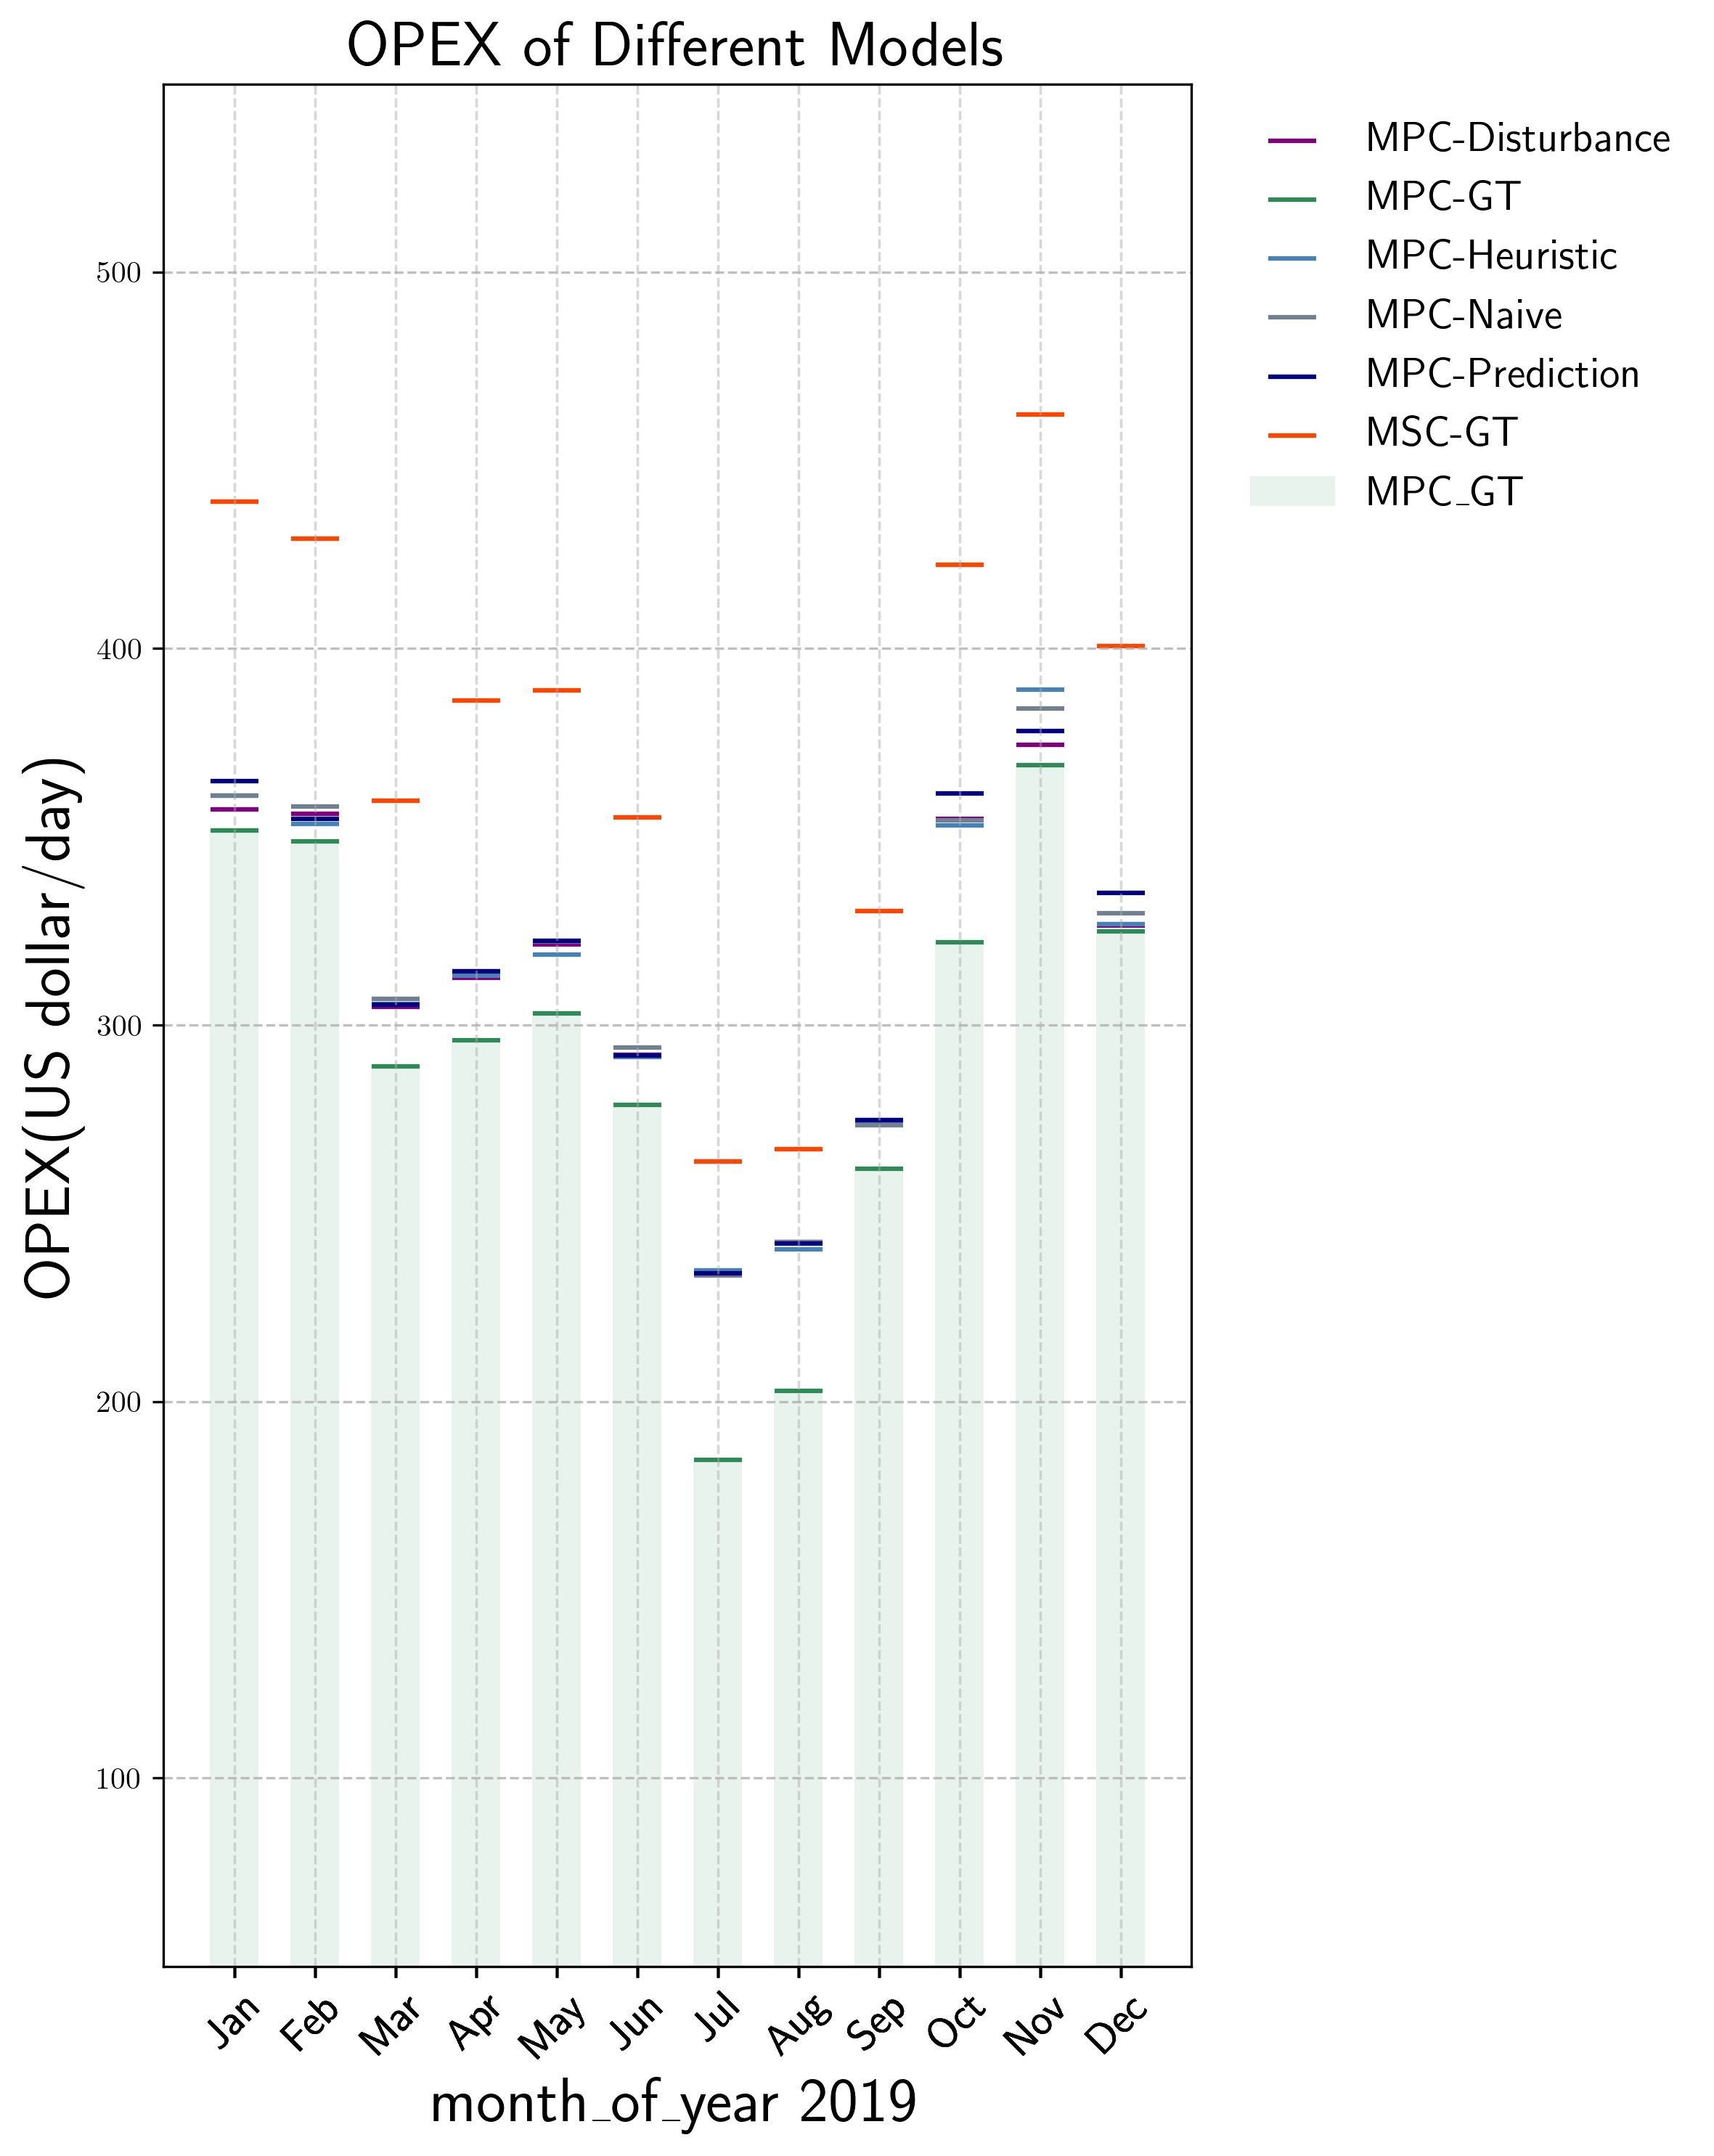

In [11]:
limit=[50,550]
figsize=(8,10)
opex_month_6dc=plot_origin_valid_bar(df=df_opex_6dc,relative=False,limit=limit,figsize=figsize,
                      key='OPEX',save_fn='thesis-topic1-6h-bat-12months-0.6dc-opex.png',
                      fontsize=14,duration_key='month_of_year')

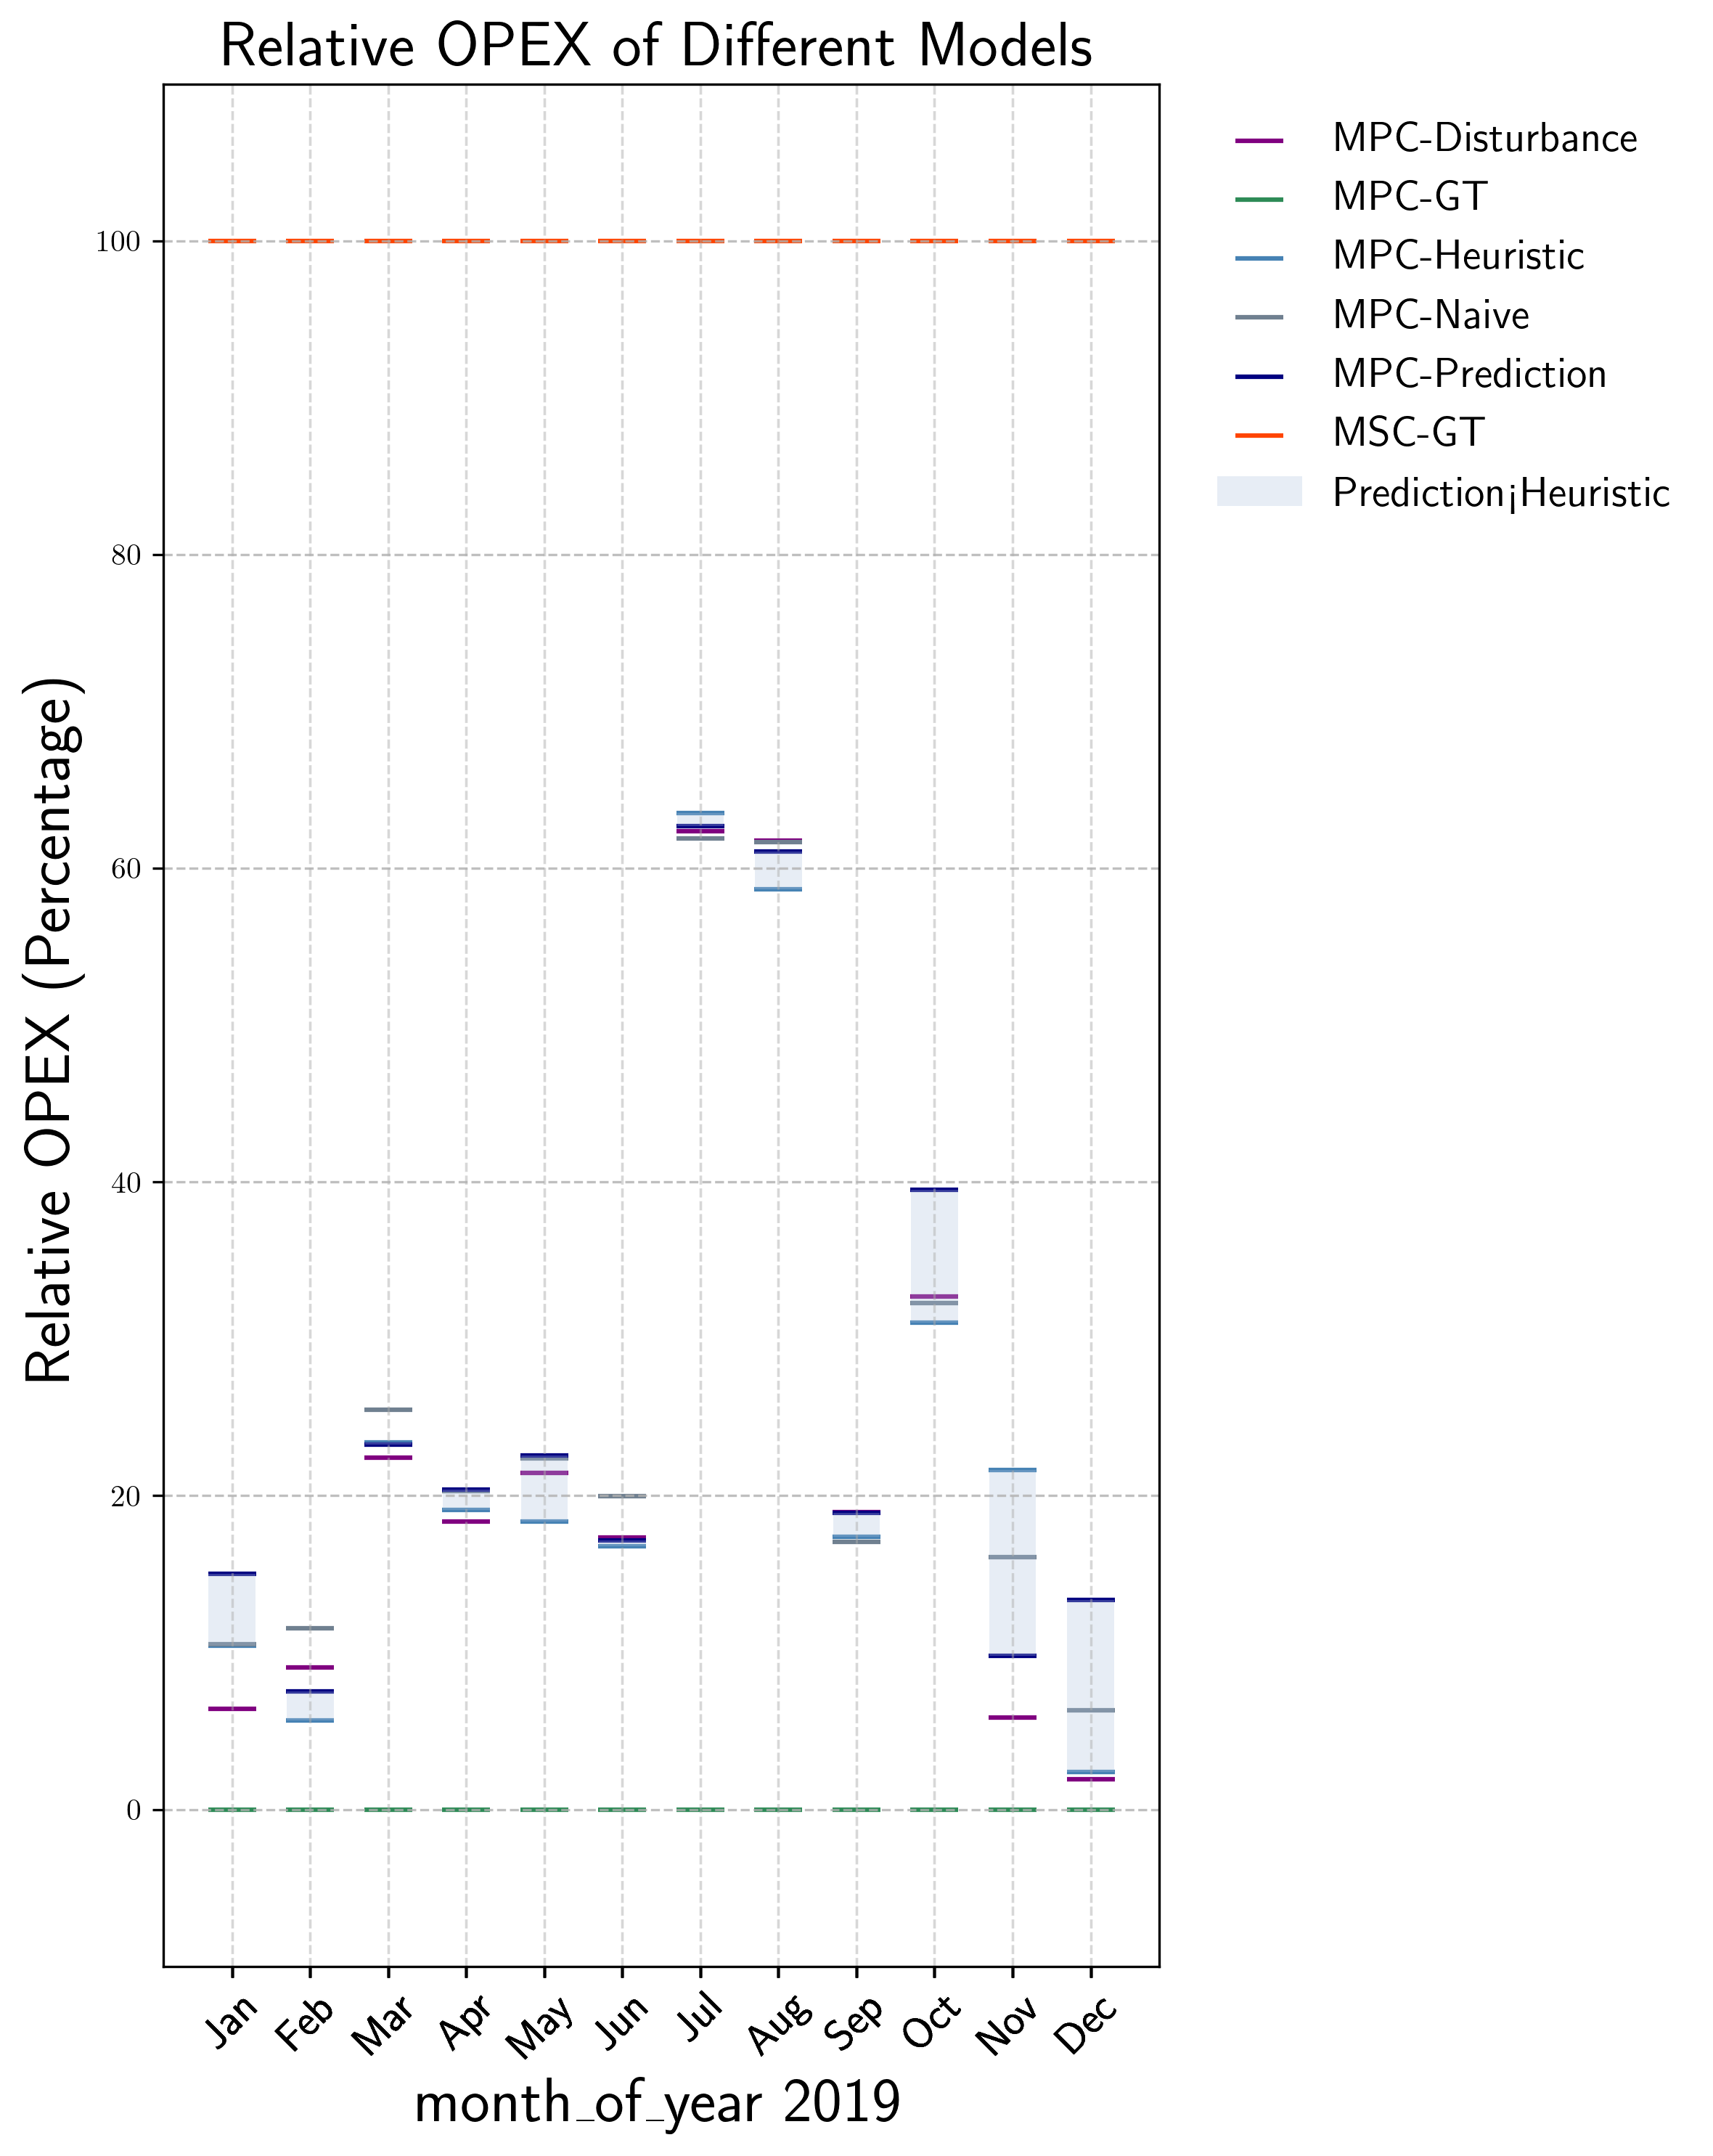

In [12]:
limit=[-10,110]
figsize=(8,10)
r_opex_month_6dc=plot_origin_valid_bar(df=df_opex_6dc,relative=True,limit=limit,figsize=figsize,
                      key='OPEX',save_fn='thesis-topic1-6h-bat-12months-0.6dc-relative-opex.png',
                      fontsize=14,duration_key='month_of_year',
                      show_notes=False)

plot_params={
    "subplot1":{
        "df":df_opex_6dc,
        "relative":True,
        "limit":[-10,110],
        "key":"OPEX",
        "fontsize":14,
        "duration_key":"month_of_year",
        "subtitle":""
    },
    "figsize":(8,10),
    "show_notes":False,
    "save_fn":'thesis-topic1-6h-bat-12months-0.6dc-relative-opex.png',
}

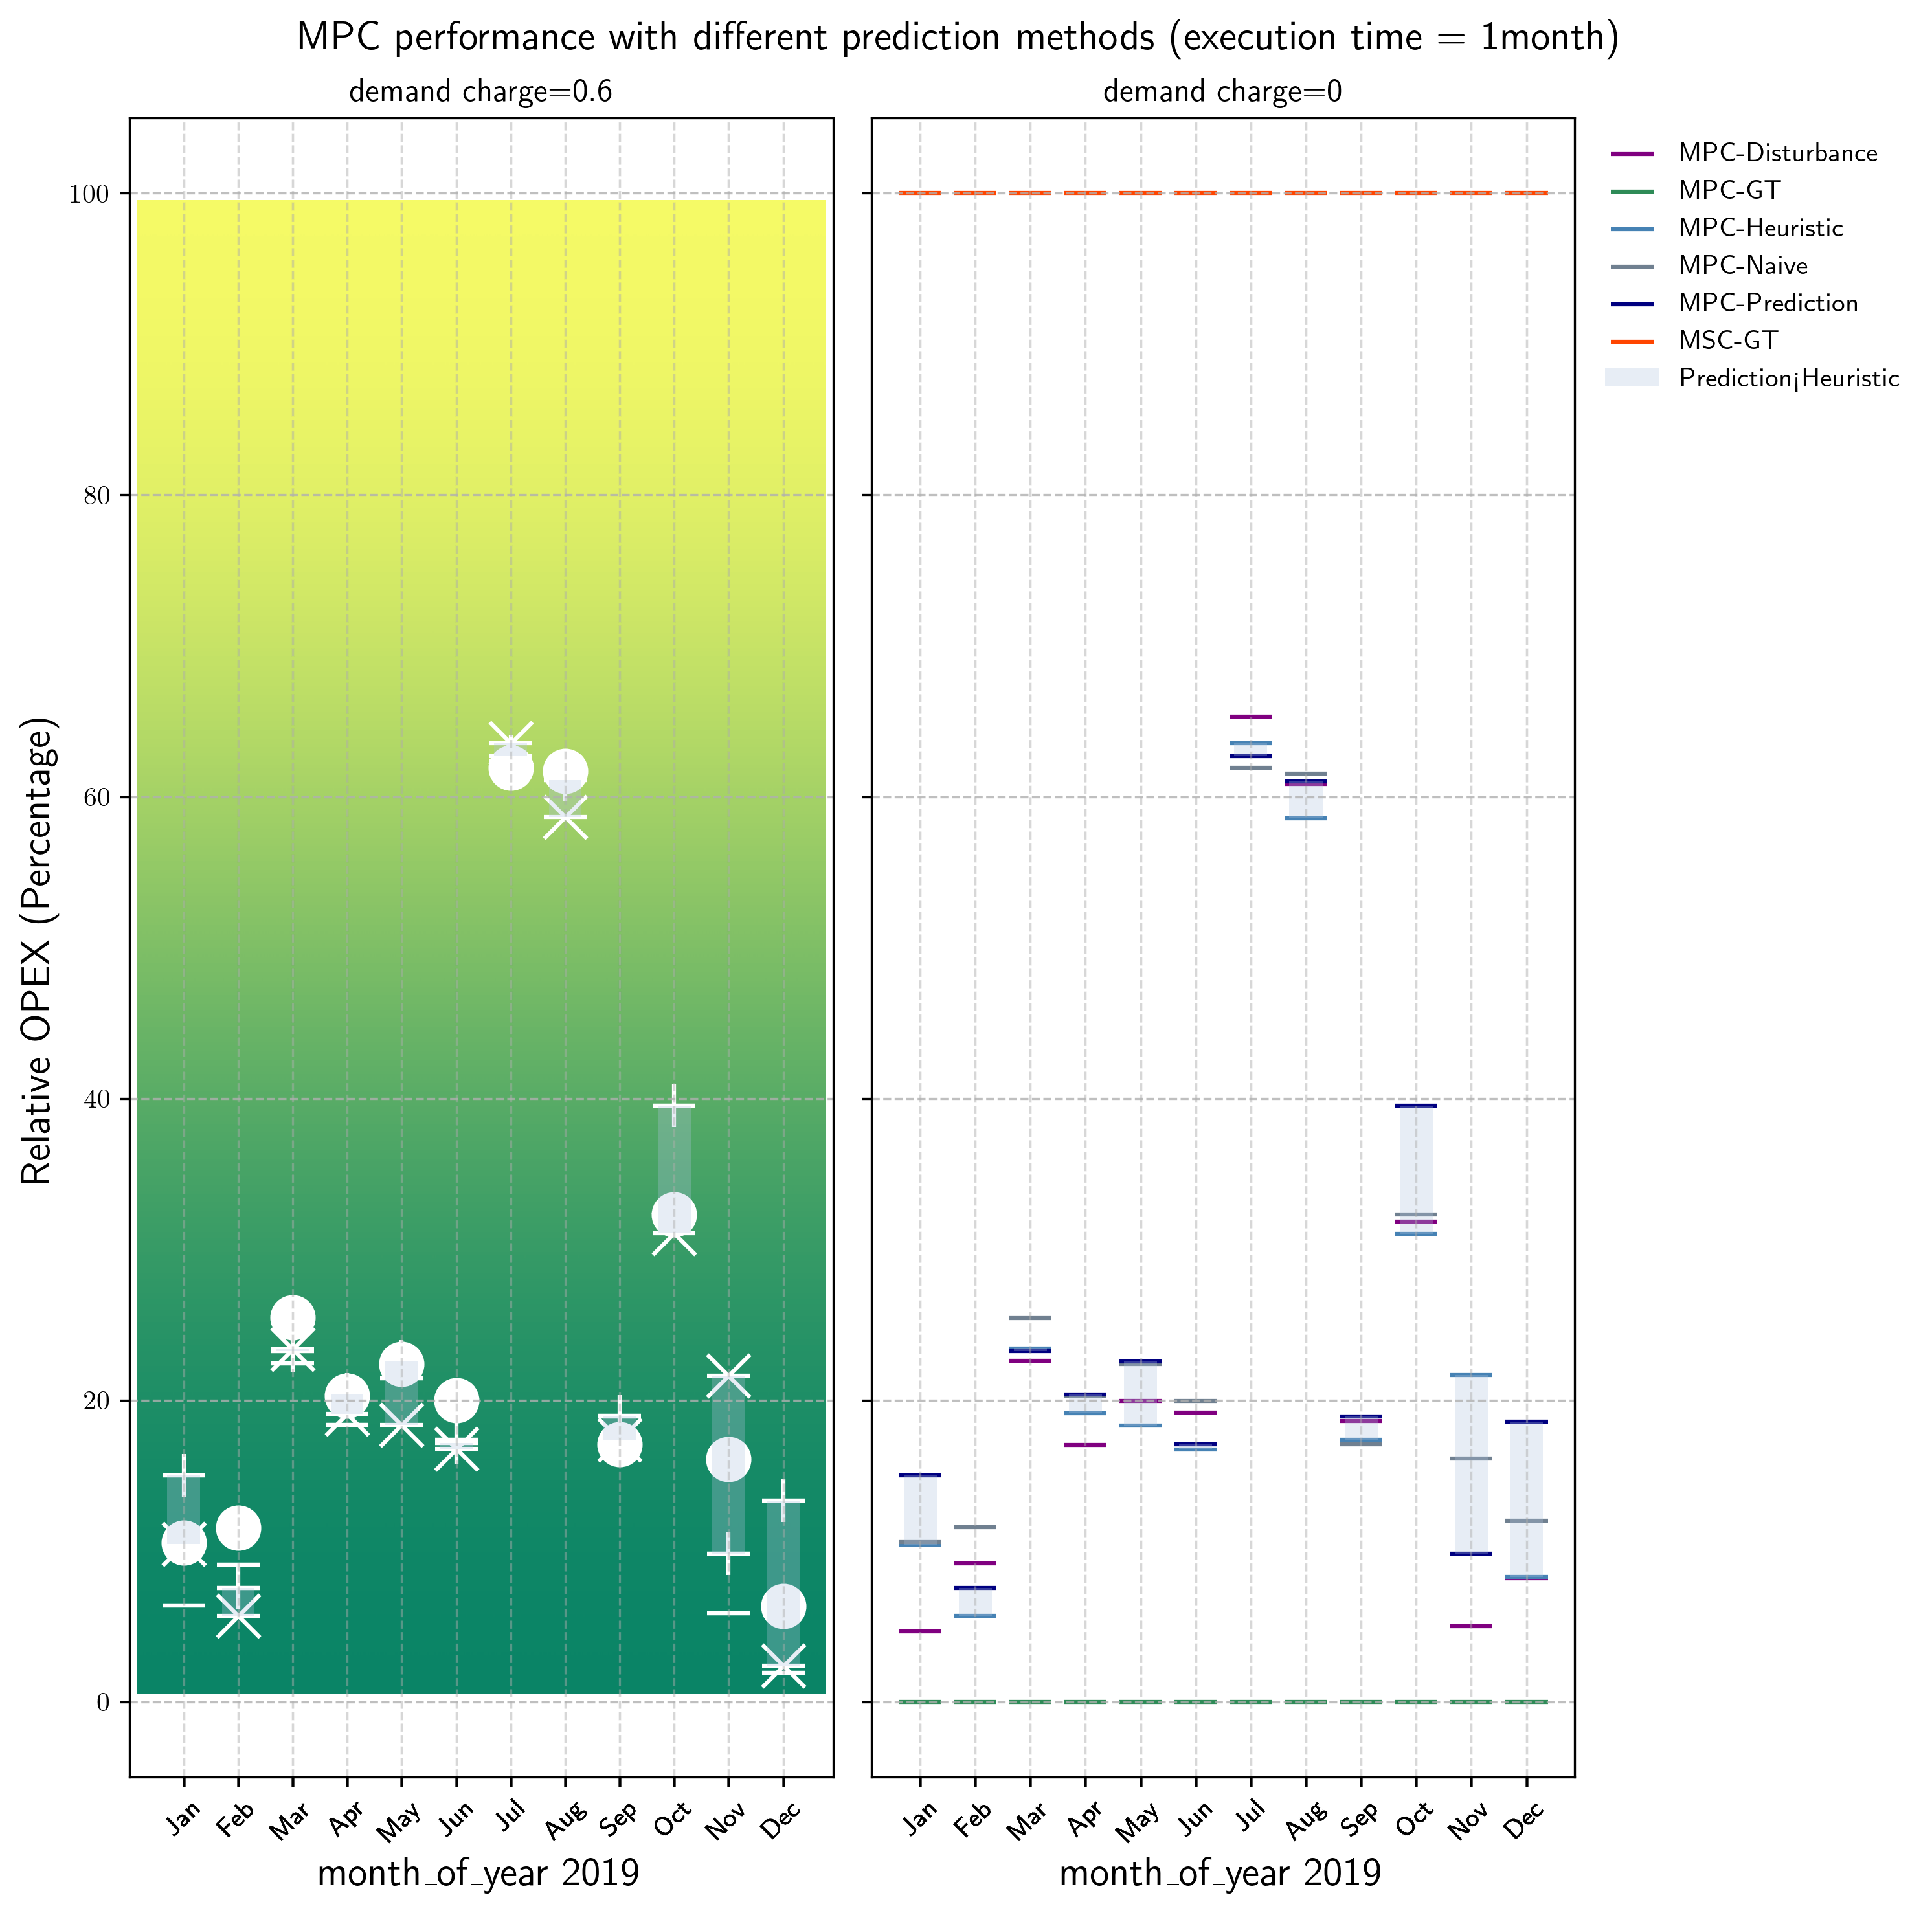

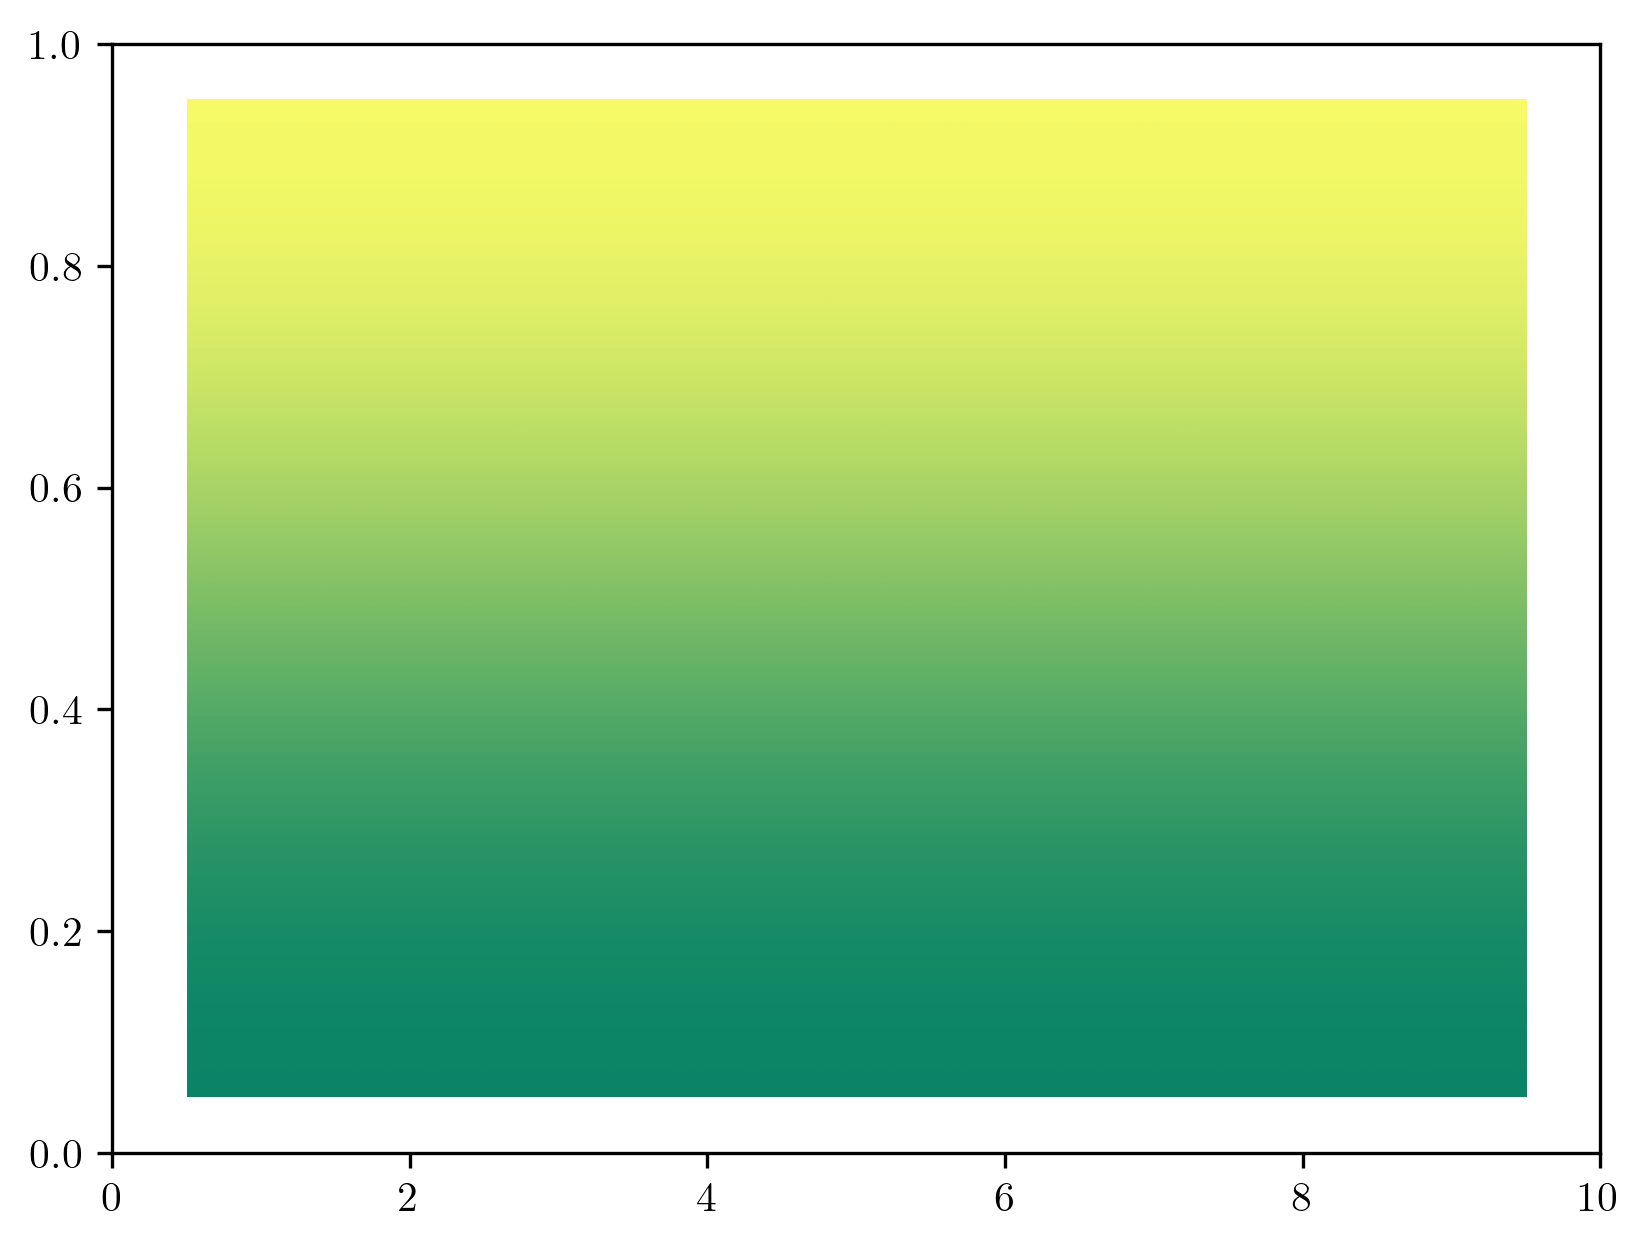

In [17]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)


def gradient_image(ax, direction=0.3, cmap_range=(0, 1), **kwargs):
    """
    Draw a gradient image based on a colormap.

    Parameters
    ----------
    ax : Axes
        The axes to draw on.
    direction : float
        The direction of the gradient. This is a number in
        range 0 (=vertical) to 1 (=horizontal).
    cmap_range : float, float
        The fraction (cmin, cmax) of the colormap that should be
        used for the gradient, where the complete colormap is (0, 1).
    **kwargs
        Other parameters are passed on to `.Axes.imshow()`.
        In particular, *cmap*, *extent*, and *transform* may be useful.
    """
    phi = direction * np.pi / 2
    v = np.array([np.cos(phi), np.sin(phi)])
    X = np.array([[v @ [1, 0], v @ [1, 1]],
                  [v @ [0, 0], v @ [0, 1]]])
    a, b = cmap_range
    X = a + (b - a) / X.max() * X
    im = ax.imshow(X, interpolation='bicubic', clim=(0, 1),
                   aspect='auto', **kwargs)
    return im


def gradient_bar(ax, x, y, width=0.5, bottom=0):
    for left, top in zip(x, y):
        right = left + width
        gradient_image(ax, extent=(left, right, bottom, top),
                       cmap=plt.cm.Blues_r, cmap_range=(0, 0.8))


fig, ax = plt.subplots()
ax.set(xlim=(0, 10), ylim=(0, 1))

# background image
gradient_image(ax, direction=0, extent=(0.05, 0.95, 0.05, 0.95), transform=ax.transAxes,
               cmap=plt.cm.summer, cmap_range=(0, 1), alpha=1)

N = 10
x = np.arange(N) + 0.15
y = np.random.rand(N)
#gradient_bar(ax, x, y, width=0.7)
plt.show()

In [9]:
plt.cm.available()

AttributeError: module 'matplotlib.cm' has no attribute 'available'